In [1]:
import sys

import so_ml_tools as soml

import tensorflow as tf

from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.losses import binary_crossentropy
from sklearn import datasets

2023-11-20 22:04:25.497718: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 22:04:25.497737: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 22:04:25.497761: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Create a moon dataset and visualize the data

In [2]:
X, y = datasets.make_moons(500, shuffle=True, random_state=42)

X[:10], y[:10]

(array([[ 0.83049507, -0.48552934],
        [ 0.60500103,  0.79622469],
        [ 0.99369162, -0.4999801 ],
        [-0.37538634,  0.92686844],
        [ 0.25577103,  0.96673739],
        [ 1.24355383, -0.46988738],
        [ 1.03153686, -0.49950259],
        [ 0.00630838,  0.9999801 ],
        [ 0.65399347,  0.75650019],
        [ 1.81490848, -0.07958966]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1]))

## Visualize the data

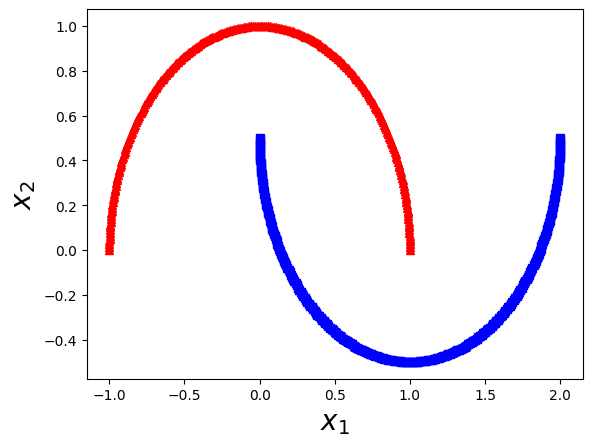

In [3]:
# Let's visualize the data so it easier to see what we're dealing with.
soml.data.plot.xy_data_with_label(x=X, y=y)

## Pre-process data

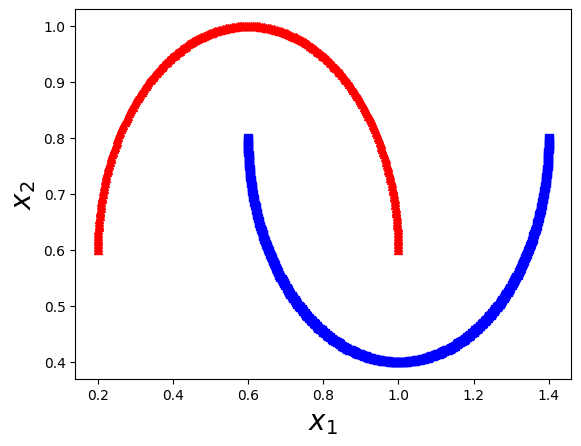

In [4]:
# The data represents two half moons intertwined, the data appears to be ranging from -0.4 to 1 on the Y axis and -1.0 to 2.0 on the X axis. models prefer data to be between 0 and 1. So we need to normalize our data.

X_norm = soml.data.normalize.normalize_vector(x=X)

# Let's plot the data again to see if the normalization did work out.

soml.data.plot.xy_data_with_label(x=X_norm, y=y)

## Create training / test data sets

In [5]:
X_train, X_test, y_train, y_test = soml.data.split.split_train_test_data(X, y)

X_train[:5], y_train[:5], X_test[:5], y_test[:5]

(array([[-0.51088642,  0.85964822],
        [ 1.94667636,  0.17781393],
        [ 1.41019154, -0.4119994 ],
        [ 0.8498262 ,  0.52706302],
        [ 0.90407356,  0.42737687]]),
 array([0, 1, 1, 0, 0]),
 array([[ 0.13714602, -0.00545327],
        [ 0.12466762,  0.01647831],
        [ 0.11274655,  0.03871775],
        [ 0.78099493, -0.47572372],
        [ 0.48911358, -0.35964822]]),
 array([1, 1, 1, 1, 1]))

## Create model_1 as a baseline

In [6]:
tf.random.set_seed(42)

model_1 = Sequential([
    Dense(10, activation="relu", input_shape=[2]),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_1.compile(loss=binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=50,
                        validation_data=(X_test, y_test))

Epoch 1/50


2023-11-20 22:04:43.067631: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


13/13 [==============================] - 0s 7ms/step - loss: 0.6654 - accuracy: 0.6775 - val_loss: 0.6485 - val_accuracy: 0.7500
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.6800 - val_loss: 0.6308 - val_accuracy: 0.6900
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.6875 - val_loss: 0.6110 - val_accuracy: 0.7100
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6075 - accuracy: 0.7100 - val_loss: 0.5908 - val_accuracy: 0.7700
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.7550 - val_loss: 0.5692 - val_accuracy: 0.7900
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5626 - accuracy: 0.7825 - val_loss: 0.5477 - val_accuracy: 0.8100
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.7950 - val_loss: 0.5248 - val_accuracy: 0.8200
Epoch 8/50
13/13 [=============

## Plot history of model_1

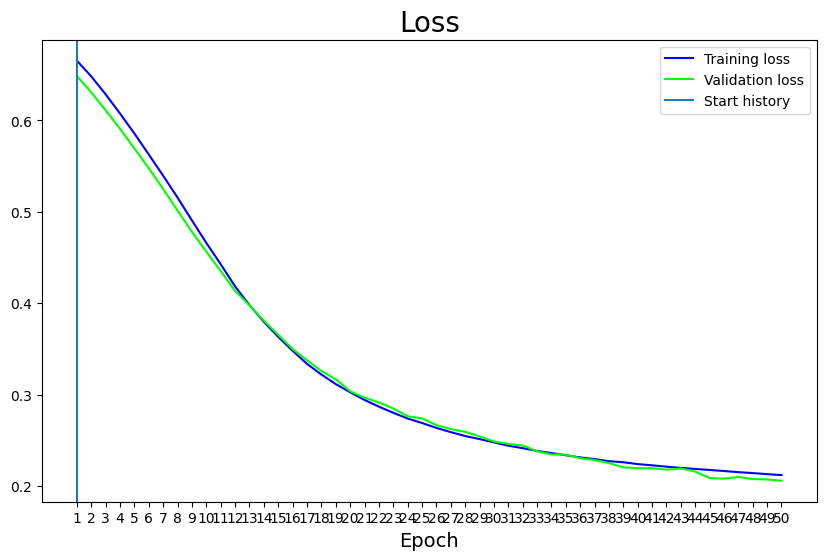

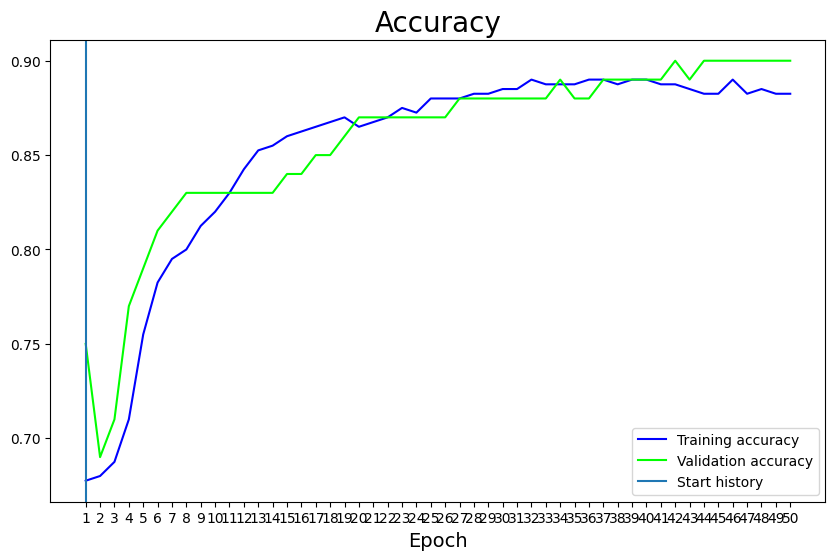

In [7]:
soml.tf.model.plot.plot_history(history=history_1)

## Evaluate the model

313/313 [==============================] - 0s 333us/step
doing binary classification


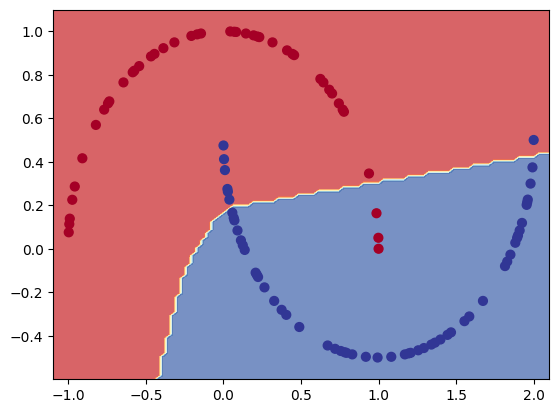

In [9]:
soml.evaluate.plot.decision_boundary(model=model_1, x=X_test, y=y_test)

4/4 [==============================] - 0s 744us/step


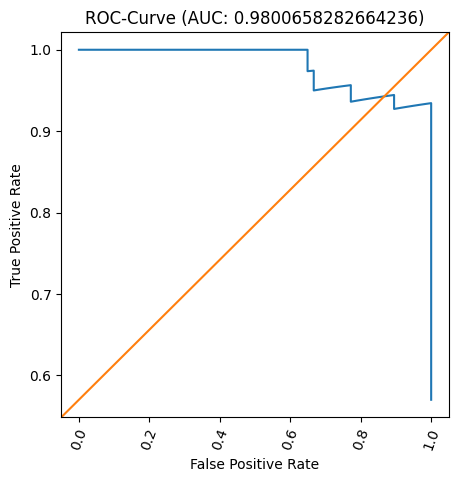

In [8]:
y_prob = model_1.predict(X_test)
soml.evaluate.plot.roc_curve(y_true=y_test, y_prob=y_prob)

## Create model_2 to find a more optimal learning rate

In [10]:
tf.random.set_seed(42)

initial_lr = 0.001
epochs = 35

model_2 = tf.keras.models.clone_model(model_1)

model_2.compile(loss=binary_crossentropy,
                optimizer=Adam(learning_rate=initial_lr),
                metrics=["accuracy"])

lr_scheduler = soml.tf.fit.callback.learning_rate_scheduler_callback(learning_rate_start=initial_lr, epochs=epochs)

history_2 = model_2.fit(X_train, y_train,
            epochs=epochs,
            validation_data=(X_test, y_test),
            callbacks=[lr_scheduler])

Min learning rate: 0.0011450475699382818
Max learning rate: 0.11450475699382813
Division: 16
Epoch 1/35
13/13 [==============================] - 0s 5ms/step - loss: 0.7174 - accuracy: 0.3725 - val_loss: 0.7017 - val_accuracy: 0.3700 - lr: 0.0010
Epoch 2/35
13/13 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6800 - val_loss: 0.6550 - val_accuracy: 0.8700 - lr: 0.0012
Epoch 3/35
13/13 [==============================] - 0s 1ms/step - loss: 0.6363 - accuracy: 0.8200 - val_loss: 0.6051 - val_accuracy: 0.8500 - lr: 0.0013
Epoch 4/35
13/13 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.8175 - val_loss: 0.5560 - val_accuracy: 0.8500 - lr: 0.0015
Epoch 5/35
13/13 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.8150 - val_loss: 0.5067 - val_accuracy: 0.8500 - lr: 0.0018
Epoch 6/35
13/13 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.8150 - val_loss: 0.4585 - val_accuracy: 0.8700 - 

## Plot history of model_2

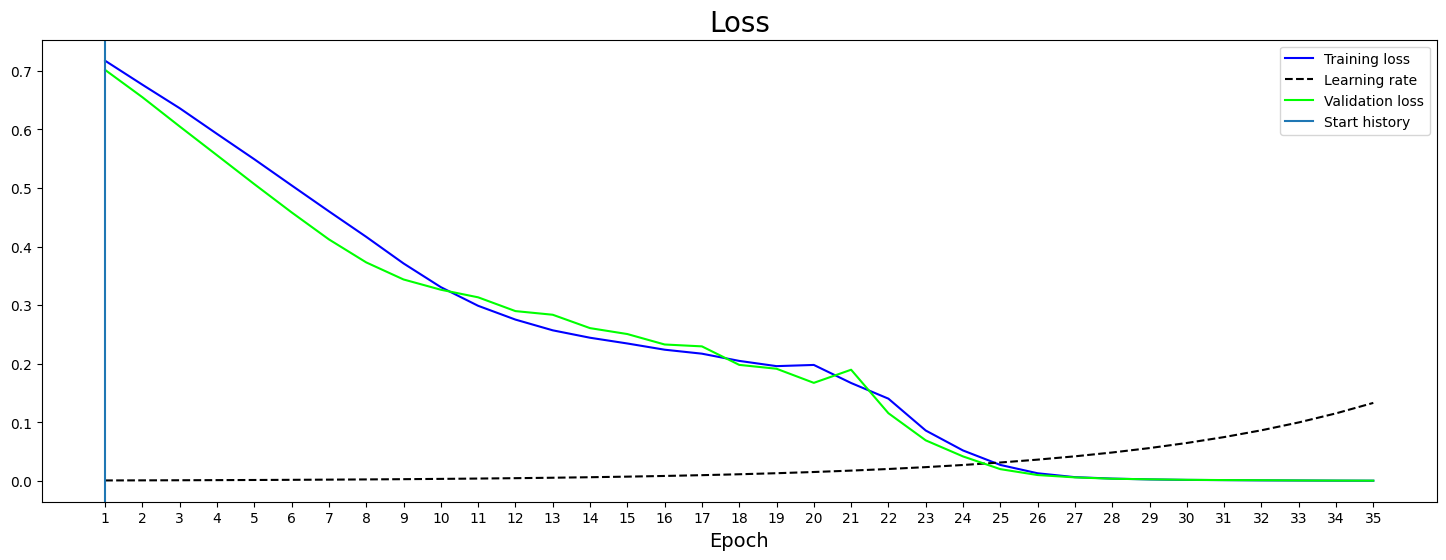

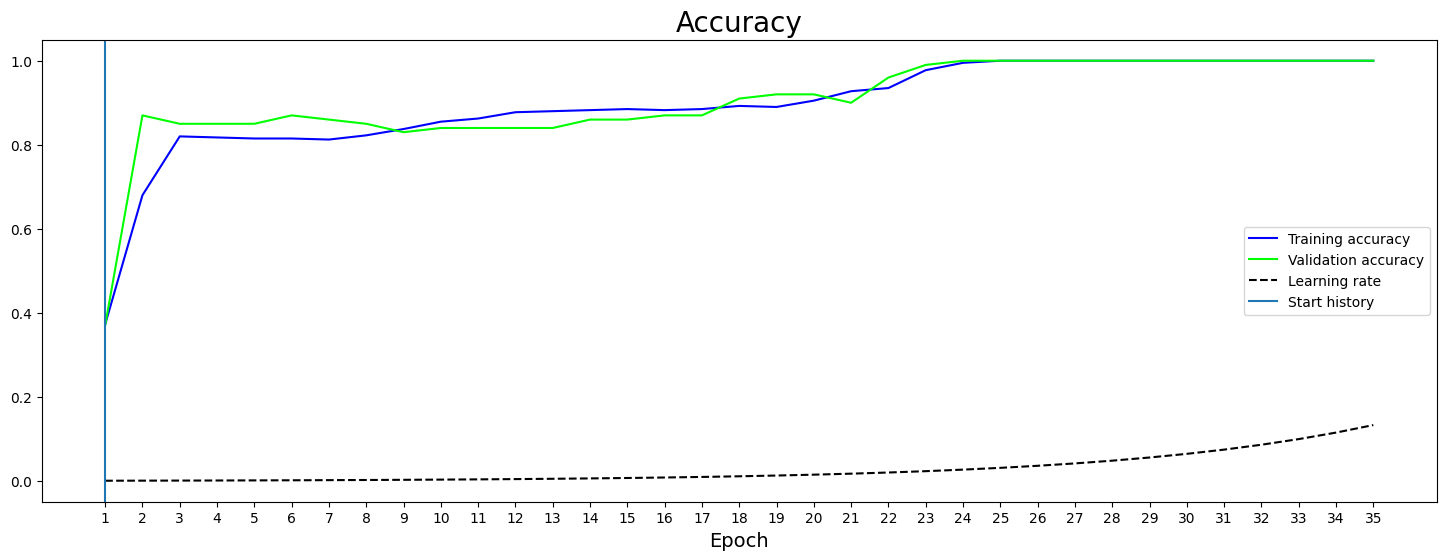

In [11]:
soml.tf.model.plot.plot_history(history=history_2, figsize=(18, 6))

In [12]:
## Evaluate the model

313/313 [==============================] - 0s 293us/step
doing binary classification


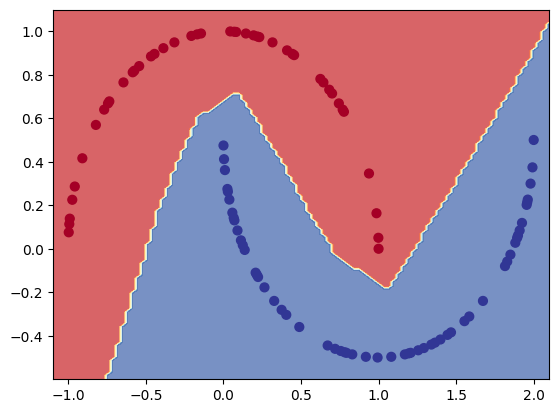

In [13]:
soml.evaluate.plot.decision_boundary(model=model_2, x=X_test, y=y_test)

## Create model_3 using the more optimal learning rate.

In [10]:
tf.random.set_seed(42)

model_3 = tf.keras.models.clone_model(model_2)

model_3.compile(loss=binary_crossentropy,
                optimizer=Adam(learning_rate=0.0147),
                metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
13/13 [==============================] - 1s 9ms/step - loss: 0.5706 - accuracy: 0.7650 - val_loss: 0.4129 - val_accuracy: 0.8300
Epoch 2/15
13/13 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8175 - val_loss: 0.2721 - val_accuracy: 0.8700
Epoch 3/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8750 - val_loss: 0.2309 - val_accuracy: 0.8900
Epoch 4/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.8950 - val_loss: 0.1592 - val_accuracy: 0.9400
Epoch 5/15
13/13 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.9200 - val_loss: 0.1259 - val_accuracy: 0.9500
Epoch 6/15
13/13 [==============================] - 0s 2ms/step - loss: 0.1328 - accuracy: 0.9400 - val_loss: 0.0913 - val_accuracy: 0.9800
Epoch 7/15
13/13 [==============================] - 0s 2ms/step - loss: 0.0884 - accuracy: 0.9700 - val_loss: 0.0692 - val_accuracy: 0.9900
Epoch 8/15
13/13 [==

## Plot history of model_3

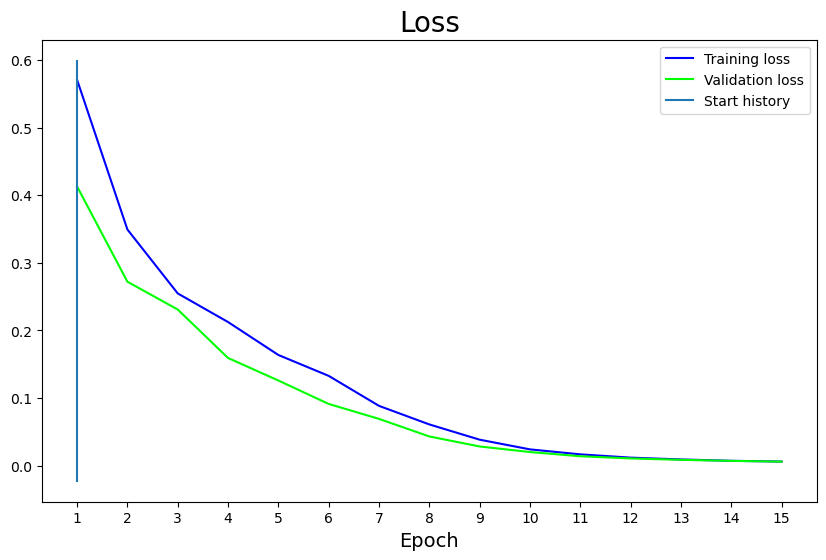

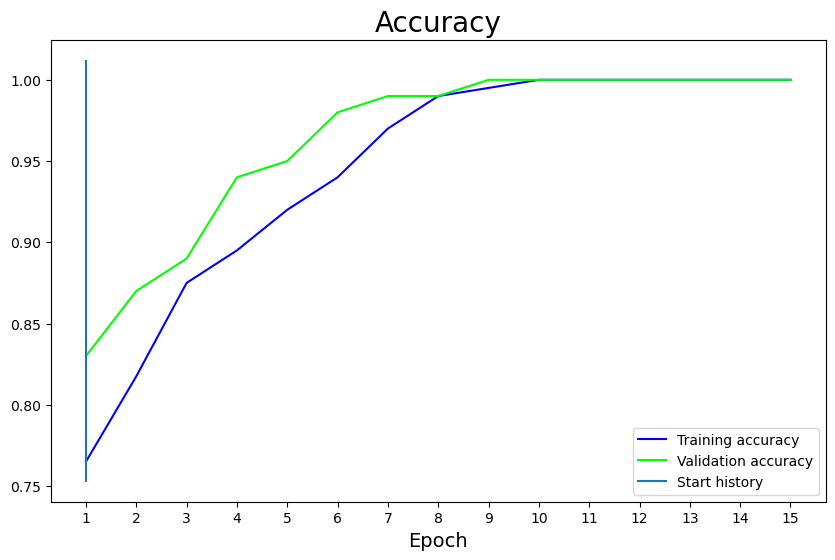

In [12]:
soml.tf.model.plot.plot_history(history=history_3)

## Plot decission boundary for model_3

313/313 [==============================] - 0s 339us/step
doing binary classification


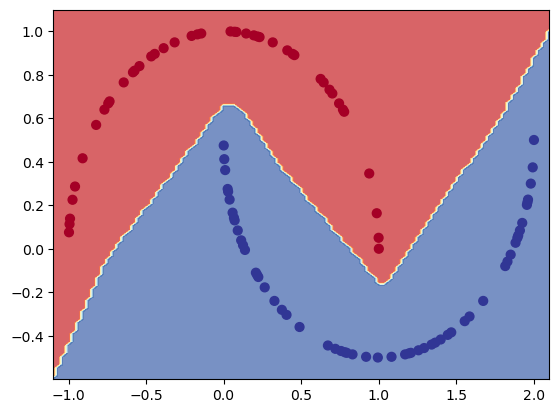

In [13]:
soml.evaluate.plot.decision_boundary(model=model_3, x=X_test, y=y_test)

# Plot confusion-matrix for model_3

4/4 [==============================] - 0s 515us/step


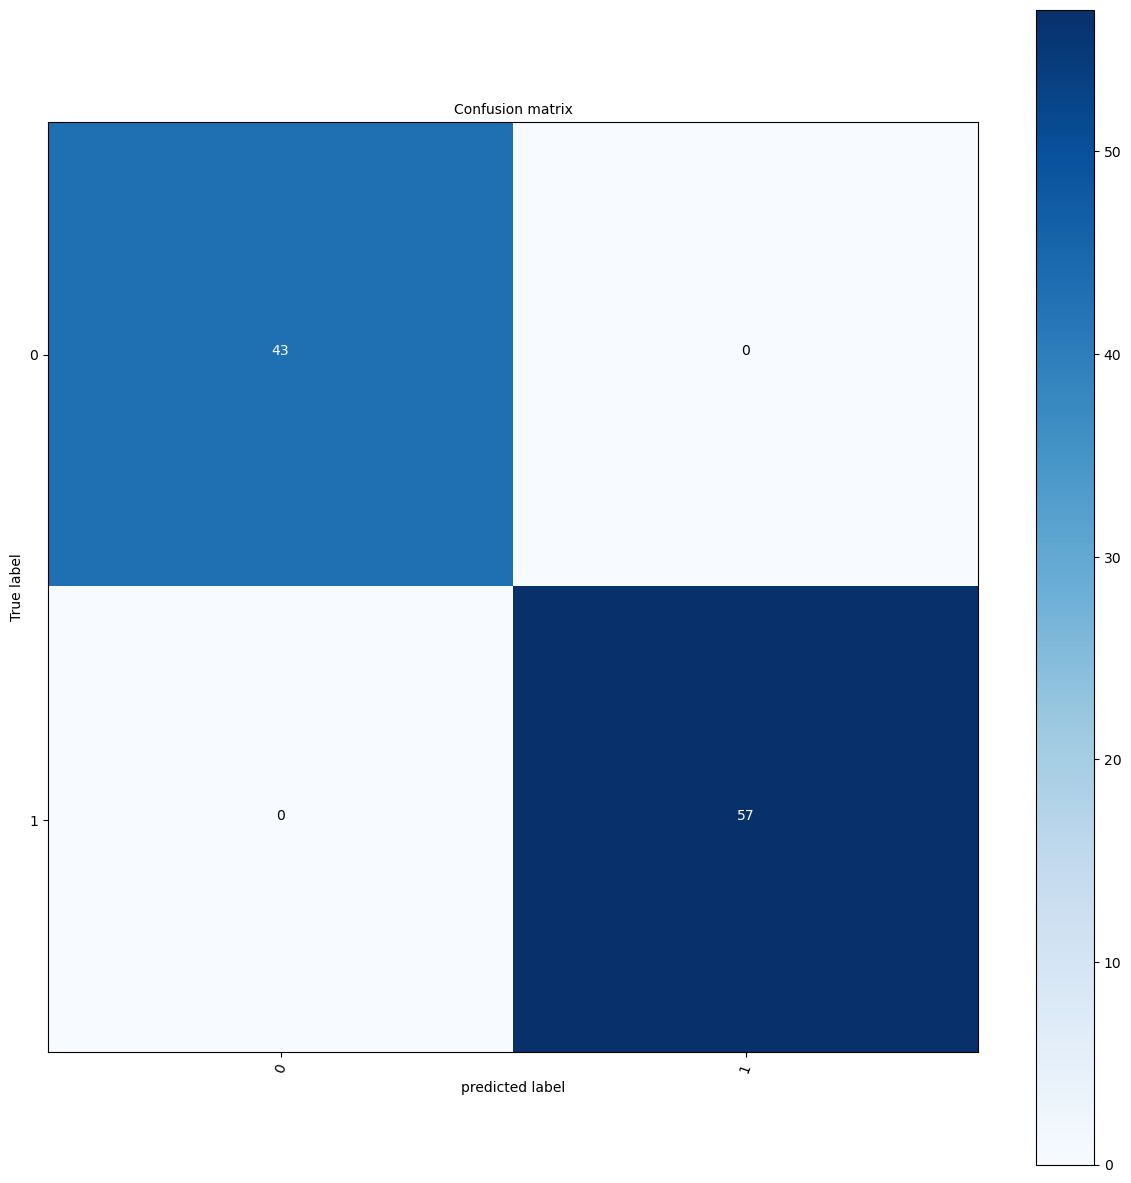

In [15]:
y_prob = model_3.predict(X_test)
soml.evaluate.plot.confusion_matrix(y_true=y_test, y_prob=y_prob)